## Book Cover dataset - transfer learning and fine-tuning approaches with ResNet50
### Training for all the 30 classes

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
path = "/datapool/bookdataset30"

In [4]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=224, bs=75)

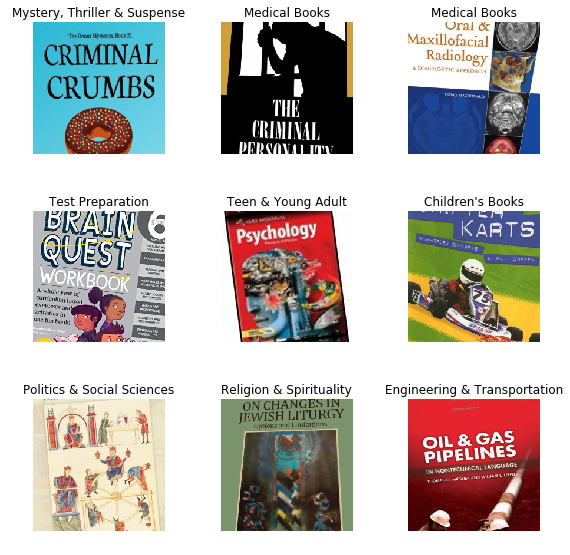

In [5]:
data.show_batch(rows=3, figsize=(8,8))

In [6]:
print(data.classes)
len(data.classes); data.c

['Arts & Photography', 'Biographies & Memoirs', 'Business & Money', 'Calendars', "Children's Books", 'Christian Books & Bibles', 'Comics & Graphic Novels', 'Computers & Technology', 'Cookbooks, Food & Wine', 'Crafts, Hobbies & Home', 'Engineering & Transportation', 'Health, Fitness & Dieting', 'History', 'Humor & Entertainment', 'Law', 'Literature & Fiction', 'Medical Books', 'Mystery, Thriller & Suspense', 'Parenting & Relationships', 'Politics & Social Sciences', 'Reference', 'Religion & Spirituality', 'Romance', 'Science & Math', 'Science Fiction & Fantasy', 'Self-Help', 'Sports & Outdoors', 'Teen & Young Adult', 'Test Preparation', 'Travel']


30

In [7]:
data.train_ds.ds

ImageClassificationDataset of len 51300

In [8]:
data.valid_ds.ds

ImageClassificationDataset of len 5700

Employing transfer learning and training just the last layer

In [9]:
learn = create_cnn(data, models.resnet50, metrics=[error_rate, accuracy])

Default learning rate is, default_lr = 3e-3

In [10]:
learn.fit_one_cycle(10)

Total time: 59:13
epoch  train_loss  valid_loss  error_rate  accuracy
1      2.881937    2.687731    0.753509    0.246491  (05:57)
2      2.676932    2.593504    0.732105    0.267895  (05:55)
3      2.635291    2.558690    0.715088    0.284912  (05:55)
4      2.573005    2.535457    0.716667    0.283333  (05:55)
5      2.522209    2.497917    0.705965    0.294035  (05:55)
6      2.451085    2.467227    0.692632    0.307368  (05:55)
7      2.394419    2.449963    0.693860    0.306140  (05:55)
8      2.349948    2.435645    0.684737    0.315263  (05:55)
9      2.299944    2.431070    0.682982    0.317018  (05:54)
10     2.282293    2.428072    0.684737    0.315263  (05:55)



In [11]:
learn.save('stage-1')

Try training all the layers, so unfreeze all of them

In [12]:
learn.unfreeze()

Find a good enough lr

In [13]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


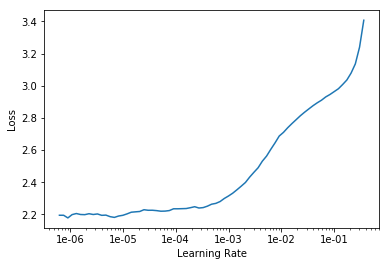

In [14]:
learn.recorder.plot()

### Interpretation

In [15]:
interp = ClassificationInterpretation.from_learner(learn)

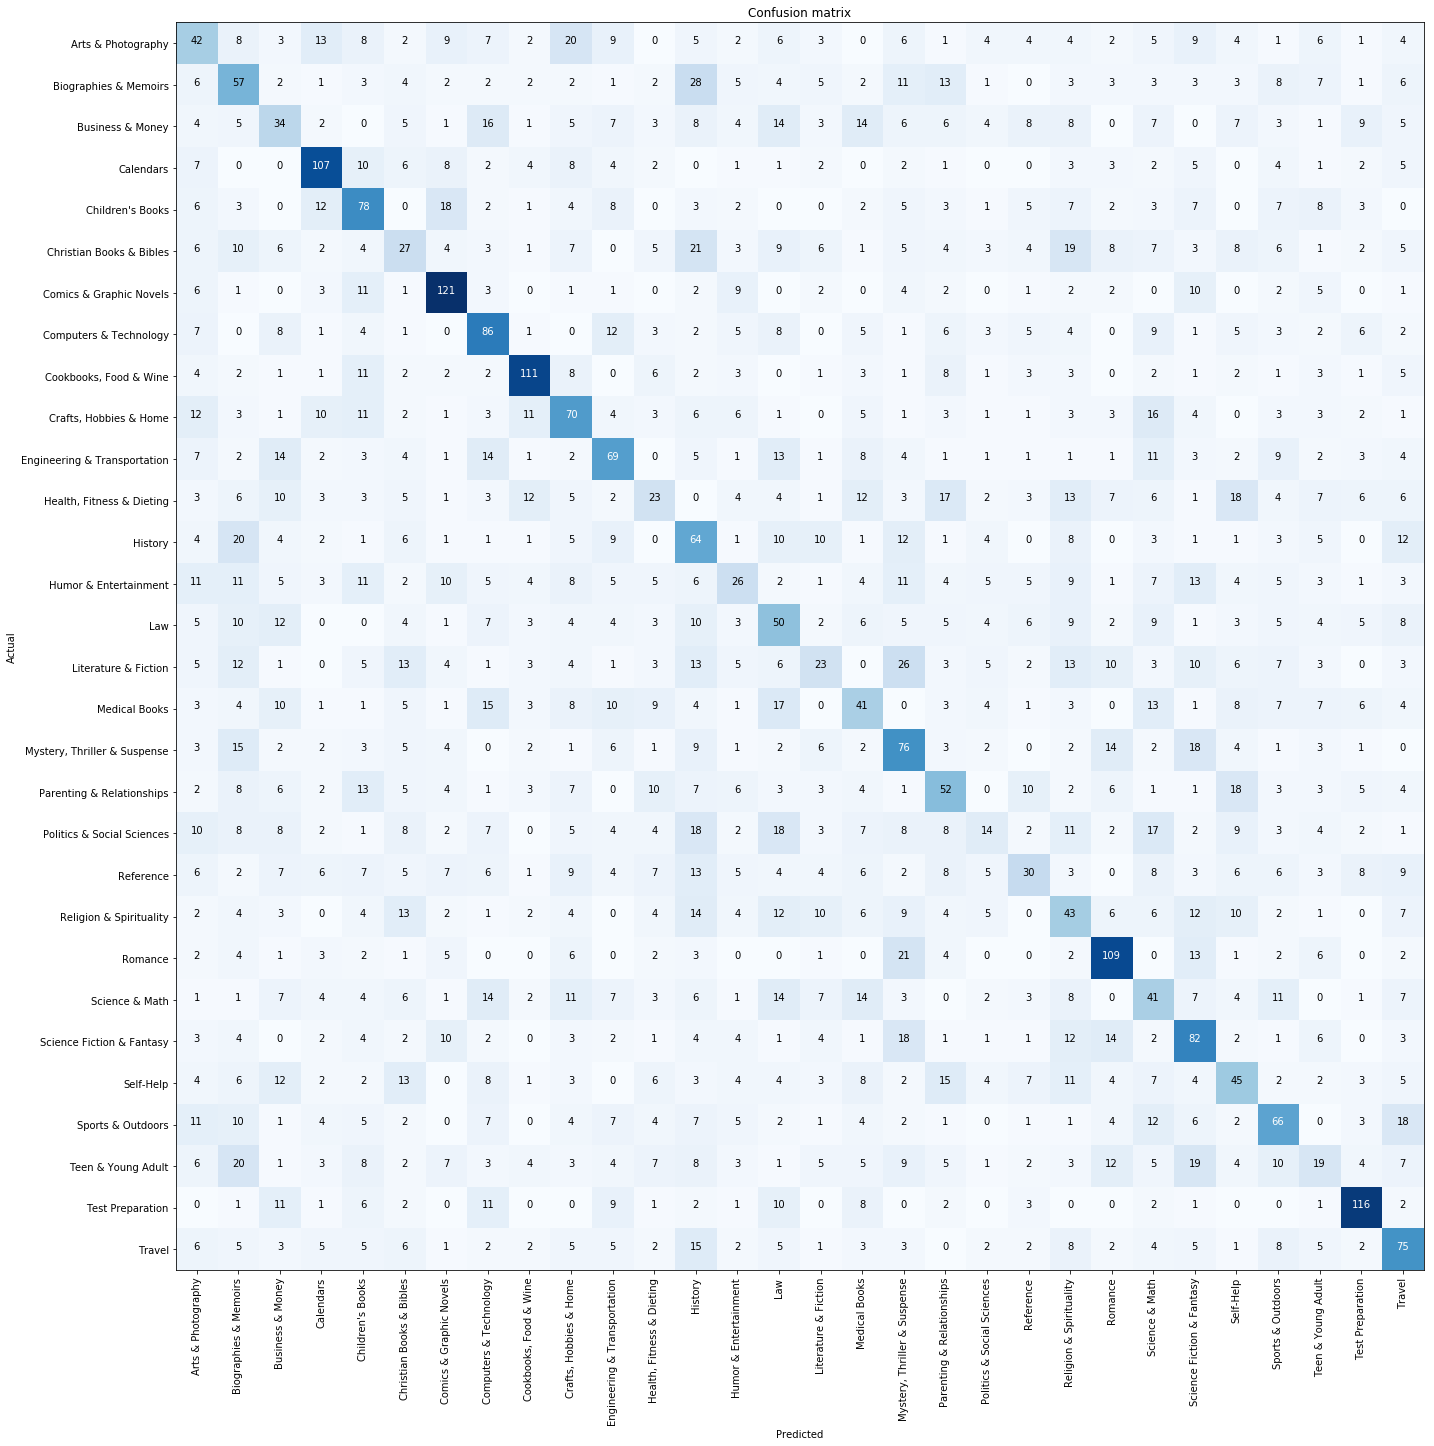

In [17]:
interp.plot_confusion_matrix(figsize=(20,20))

Note: The following hasn't been run yet

In [17]:
learn.fit_one_cycle(5, max_lr=slice(1e-5,3e-3/5))

Total time: 03:49
epoch  train_loss  valid_loss  error_rate  accuracy
1      2.193151    2.872168    0.749097    0.250903  (00:44)
2      2.206949    3.025886    0.783394    0.216607  (00:46)
3      1.950582    2.932349    0.776173    0.223827  (00:46)
4      1.436032    2.935678    0.781588    0.218412  (00:46)
5      1.016797    2.945034    0.767148    0.232852  (00:46)

